In [1]:
from main import BeerConsumptionForecast

In [2]:
steps=48
path = 'data.csv'
beer_forecast = BeerConsumptionForecast(path)

In [3]:
print("Adjusted R-squared:", beer_forecast.adjusted_r_squared())

c:\Users\erios\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Adjusted R-squared: 0.8388916037582688


# Model Components

The model being used is a local linear trend model with a stochastic seasonal component of 48 periods. This means the model has a trend component, a seasonal component with a 48-period cycle, and an irregular component.

# Estimated Coefficients

The coefficients represent the variance of each unobserved component:

* `sigma2.irregular`: The variance of the irregular component is estimated at 95.3886. The p-value is 0.000, which is less than 0.05, indicating that the irregular component is statistically significant.

* `sigma2.level`: The variance of the level component is estimated at 6.047e-11. The p-value is 1.000, which is greater than 0.05, indicating that the level component is not statistically significant.

* `sigma2.trend`: The variance of the trend component is estimated at 0.0018. The p-value is 0.131, which is greater than 0.05, indicating that the trend component is not statistically significant.

* `sigma2.seasonal`: The variance of the seasonal component is estimated at 1.016e-10. The p-value is 1.000, which is greater than 0.05, indicating that the seasonal component is not statistically significant.

# Model Diagnostics

* **Ljung-Box Test (Q)**: This tests for autocorrelation in the residuals. A Prob(Q) value less than 0.05 indicates the presence of autocorrelation. In this case, Prob(Q) is 0.04, suggesting there might be autocorrelation in the residuals.

* **Jarque-Bera Test (JB)**: This tests for normality of the residuals. A Prob(JB) value less than 0.05 indicates the residuals are not normally distributed. In this case, Prob(JB) is 0.00, suggesting the residuals are not normally distributed.

* **Heteroskedasticity (H)**: This tests for the presence of heteroskedasticity in the residuals. A Prob(H) value less than 0.05 indicates the presence of heteroskedasticity. In this case, Prob(H) is 0.00, suggesting there might be heteroskedasticity in the residuals.

* **Skew and Kurtosis:** These values describe the shape of the residual distribution. In this case, skew is -0.15, indicating a slight negative skew, and kurtosis is 3.91, suggesting a distribution with slightly heavier tails than a normal distribution.

# Conclusion

Based on the results, the irregular component is the only statistically significant component in the model. The trend and seasonal components are not significant, which might imply that the model is not adequately capturing the underlying patterns in the data.

Moreover, the diagnostic tests indicate potential issues with autocorrelation and heteroskedasticity in the residuals, as well as non-normality of the residual distribution. These issues might affect the model's reliability and the accuracy of the forecasts. Further model refinement and validation may be necessary to improve the model's performance.

In [4]:
print("\nComponent Significance:\n", beer_forecast.component_significance())


Component Significance:
                             Unobserved Components Results                            
Dep. Variable:                   consumption   No. Observations:                  476
Model:                    local linear trend   Log Likelihood               -1653.693
                   + stochastic seasonal(48)   AIC                           3315.387
Date:                       Tue, 18 Apr 2023   BIC                           3331.614
Time:                               11:37:36   HQIC                          3321.796
Sample:                                    0                                         
                                       - 476                                         
Covariance Type:                         opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular    95.3886   

In [5]:
print("\nForecasted data:\n", beer_forecast.forecast(steps=steps))


Forecasted data:
 477    136.407229
478    157.827570
479    163.870634
480    177.069516
481    146.782442
482    141.817586
483    150.502950
484    136.348814
485    130.104906
486    116.821370
487    127.197912
488    132.404808
489    138.142003
490    152.249423
491    162.387184
492    178.095197
493    148.693945
494    138.622813
495    146.151817
496    134.061313
497    132.711010
498    115.231166
499    126.541351
500    133.461883
501    135.282768
502    156.563771
503    166.645186
504    173.246938
505    144.519332
506    134.491852
507    145.704473
508    134.737611
509    127.161020
510    118.564744
511    124.778630
512    129.532835
513    133.737350
514    155.042006
515    164.177082
516    175.582441
517    140.698546
518    129.784727
519    147.170942
520    128.037809
521    128.594794
522    113.332233
523    120.619762
524    129.987575
Name: predicted_mean, dtype: float64


c:\Users\erios\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


c:\Users\erios\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


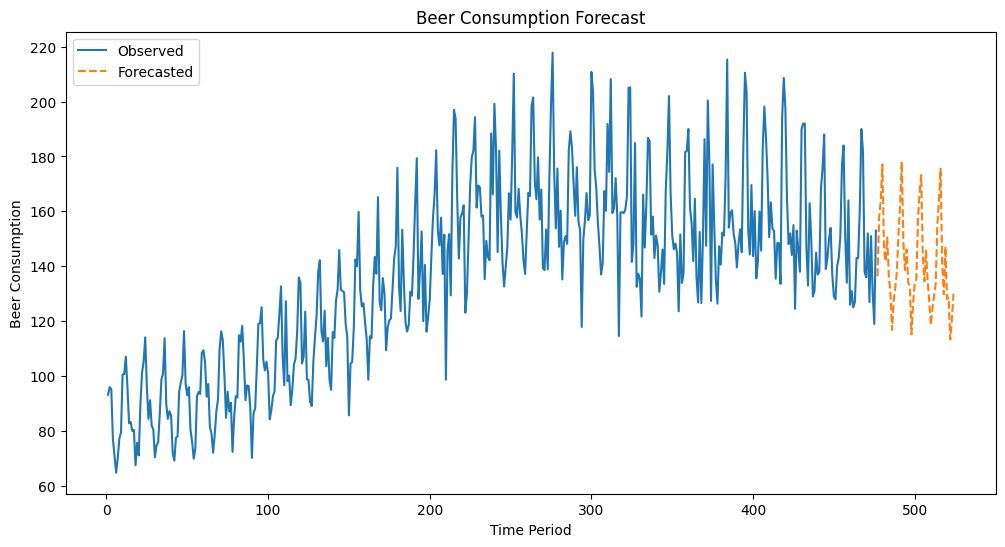

In [6]:
beer_forecast.plot_data(steps=steps)